<a href="https://colab.research.google.com/github/deep1003/deep1003/blob/master/Week_07_Statistical_Analysis_1018_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Colab User Guide**

**Colab 단축키**

In [2]:
# Colab 단축키
# Ctrl + S (저장)
# Ctrl + Enter (셀하나 실행)
# Ctrl + Shift + Enter (선택한 코드만 실행)
# Ctrl + F9 (전체실행)
# Ctrl + F8 (현재 셀 포함 이전 전체 실행)
# Ctrl + F10 (현재 셀 포함 이후 전체 실행)

**패키지 설치** (Colab은 새로 시작할 때마다 패키지를 설치하고, 라이브러리를 불러와야 한다.)

In [3]:
# Colab에 기본적으로 설치된 라이브러리: pandas, matplotlib, numpy
# 설치가 필요한 라이브러리: networkx, seaborn
# Colab에서는 '!'를 사용해야 한다.

!pip install seaborn
!pip install networkx


**라이브러리 불러오기**

In [4]:
# pandas 라이브러리를 'pd'로 가져오기 (데이터 처리)
import pandas as pd
# matplotlib의 pyplot 모듈을 'plt'로 가져오기 (그래프 시각화)
import matplotlib.pyplot as plt
# numpy 라이브러리를 'np'로 가져오기 (수치 연산)
import numpy as np
# seaborn 라이브러리를 'sns'로 가져오기 (통계적 데이터 시각화)
import seaborn as sns
# networkx 라이브러리를 'nx'로 가져오기 (네트워크 분석)
import networkx as nx

#**Hypothesis Test**


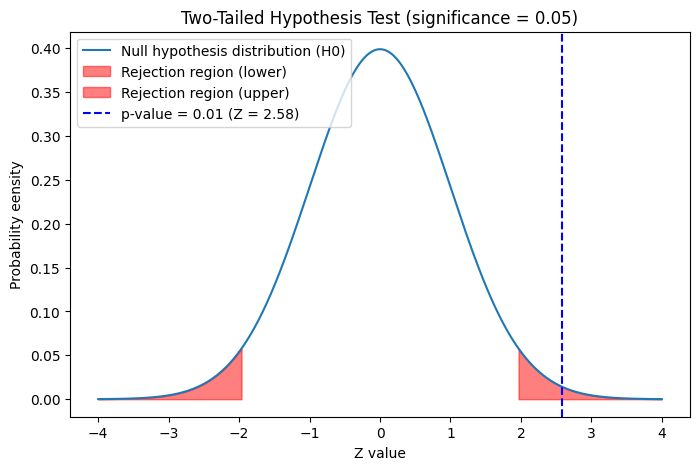

Reject H0? Yes


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# 목적: 두 측면 검정을 위한 정규 분포 그래프를 그리고, p-value가 0.01일 때 H0를 기각하는지 확인

alpha = 0.05  # 유의수준 (양측 검정)
p_value = 0.01  # 주어진 p-value
mu = 0  # 귀무가설 분포의 평균
sigma = 1  # 표준편차

# 양측 검정을 위한 임계값 계산
critical_value_low = norm.ppf(alpha / 2)
critical_value_high = norm.ppf(1 - alpha / 2)

# 정규 분포 값을 생성
x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, mu, sigma)

# 정규 분포 그래프 그리기
plt.figure(figsize=(8, 5))
plt.plot(x, y, label='Null hypothesis distribution (H0)')

# 기각 영역 채우기 (좌측과 우측)
plt.fill_between(x, 0, y, where=(x < critical_value_low), color='red', alpha=0.5, label='Rejection region (lower)')
plt.fill_between(x, 0, y, where=(x > critical_value_high), color='red', alpha=0.5, label='Rejection region (upper)')

# p-value 위치 표시
p_value_z = norm.ppf(1 - p_value / 2)  # p-value에 해당하는 z-점수 변환
plt.axvline(x=p_value_z, color='blue', linestyle='--', label=f'p-value = {p_value} (Z = {p_value_z:.2f})')

# 그래프에 제목과 축 레이블 추가
plt.title(f'Two-Tailed Hypothesis Test (significance = {alpha})')
plt.xlabel('Z value')
plt.ylabel('Probability eensity')
plt.legend()

# 그래프 표시
plt.show()

# H0 기각 여부 결정
reject_H0 = p_value < alpha
print(f"Reject H0? {'Yes' if reject_H0 else 'No'}")


## **5. Logistic Regression**



##**5.2 Bernoulli distribution**

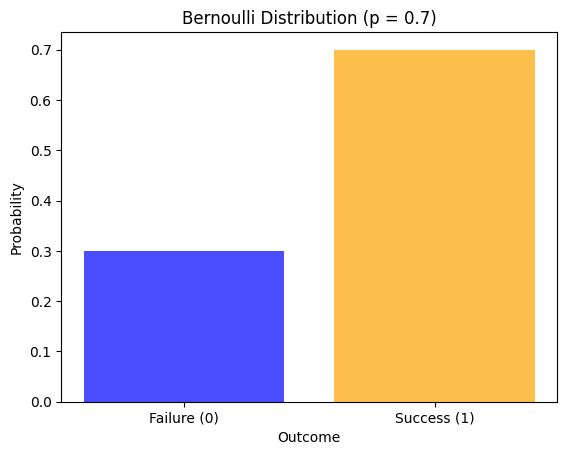

In [10]:
from scipy.stats import bernoulli

# Set the probability of success (p)
p = 0.7  # You can change this to any value between 0 and 1

# Create sample data from Bernoulli distribution
n_samples = 1000
data = bernoulli.rvs(p, size=n_samples)

# Plot the PDF of Bernoulli distribution
x = [0, 1]
pmf = [1 - p, p]

plt.bar(x, pmf, color=['blue', 'orange'], alpha=0.7)
plt.xticks(x, ['Failure (0)', 'Success (1)'])
plt.title(f'Bernoulli Distribution (p = {p})')
plt.xlabel('Outcome')
plt.ylabel('Probability')
plt.show()


##**5.2 Logistic function (probability form)**


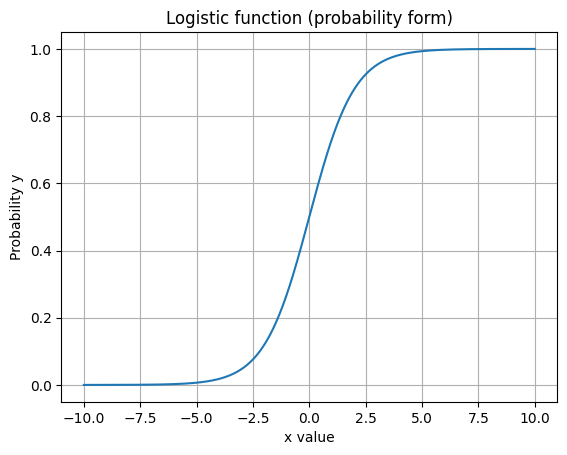

In [11]:

# 입력 값 x 생성 (-10부터 10까지 1000개의 값)
x = np.linspace(-10, 10, 1000)

# 로지스틱 함수 계산: y = 1 / (1 + exp(-x))
y = 1 / (1 + np.exp(-x))

# 로지스틱 함수 그래프 그리기
plt.plot(x, y)
plt.title('Logistic function (probability form)')
plt.xlabel('x value')
plt.ylabel('Probability y')
plt.grid(True)
plt.show()


##**5.4 Data**

In [12]:
# @title  나이, 연령  그룹, 심장병 여부 데이터 생성
data = {
    'ID': list(range(1, 101)),  # 1부터 100까지의 ID 리스트 생성
    # range(1, 101)을 사용한 이유는 파이썬의 range() 함수가 시작 값은 포함하지만 종료 값은 포함하지 않기 때문임. 따라서, range(1, 101)을 사용하면 1부터 100까지의 숫자가 생성됩

    'AGE': [  # 나이 데이터
        20, 23, 24, 25, 25, 26, 26, 28, 28, 29,
        30, 30, 30, 30, 30, 30, 32, 32, 33, 33,
        34, 34, 34, 34, 34, 35, 35, 36, 36, 36,
        37, 37, 37, 38, 38, 39, 39, 40, 40, 41,
        41, 42, 42, 42, 42, 43, 43, 43, 44, 44,

        44, 44, 45, 45, 46, 46, 47, 47, 47, 48,
        48, 48, 49, 49, 49, 50, 50, 51, 52, 52,
        53, 53, 54, 55, 55, 55, 56, 56, 56, 57,
        57, 57, 57, 57, 57, 58, 58, 58, 59, 59,
        60, 60, 61, 62, 62, 63, 64, 64, 65, 69
    ],
    'AGRP': [  # 연령 그룹 데이터
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

        4, 4, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 5, 6, 6, 6, 6, 6,
        6, 6, 6, 7, 7, 7, 7, 7, 7, 7,
        7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
        8, 8, 8, 8, 8, 8, 8, 8, 8, 8
    ],
    'CHD': [  # 심장병 여부 데이터 (0: 없음, 1: 있음)
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
        0, 1, 0, 0, 0, 0, 1, 0, 1, 0,

        1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
        0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
        1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
        0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 1, 1, 1, 0, 1, 1, 1
    ]
}

# 데이터 프레임 생성
df = pd.DataFrame(data)


In [13]:
# @title  데이터프레임(df)의 첫 5 행 출력
print(df.head())

   ID  AGE  AGRP  CHD
0   1   20     1    0
1   2   23     1    0
2   3   24     1    0
3   4   25     1    0
4   5   25     1    1


In [14]:
# @title output dimension of data frame
df.shape

(100, 4)

In [15]:
# @title check number of nulls and data type of data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ID      100 non-null    int64
 1   AGE     100 non-null    int64
 2   AGRP    100 non-null    int64
 3   CHD     100 non-null    int64
dtypes: int64(4)
memory usage: 3.2 KB


In [16]:
# @title  output variable name set of data frame
df.columns

Index(['ID', 'AGE', 'AGRP', 'CHD'], dtype='object')

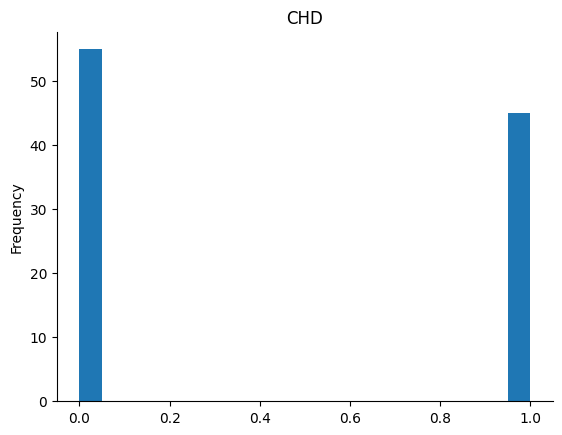

In [17]:
# @title CHD (심장병 여부)

from matplotlib import pyplot as plt
df['CHD'].plot(kind='hist', bins=20, title='CHD')
plt.gca().spines[['top', 'right',]].set_visible(False)

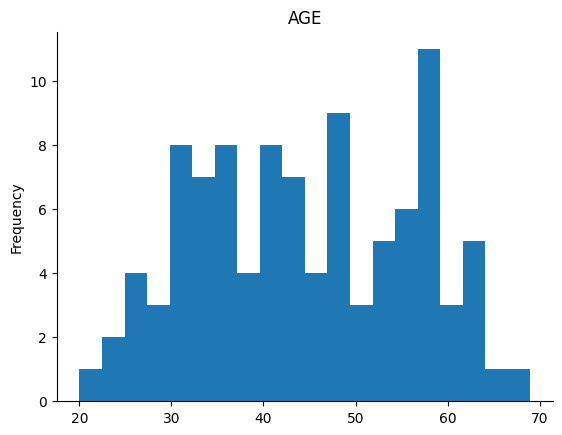

In [18]:
# @title AGE(나이)

from matplotlib import pyplot as plt
df['AGE'].plot(kind='hist', bins=20, title='AGE')
plt.gca().spines[['top', 'right',]].set_visible(False)

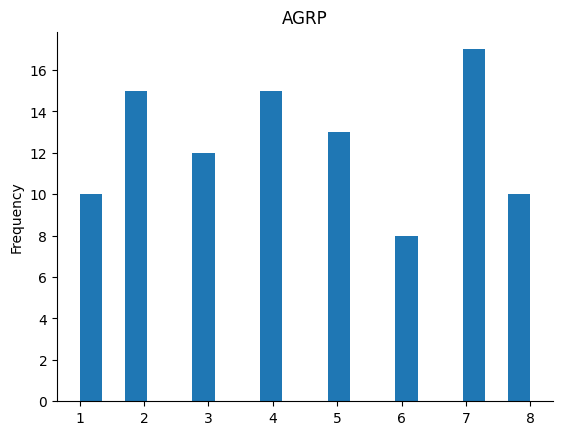

In [19]:
# @title AGRP (나이그룹)

from matplotlib import pyplot as plt
df['AGRP'].plot(kind='hist', bins=20, title='AGRP')
plt.gca().spines[['top', 'right',]].set_visible(False)

##**5.5 Results**


In [20]:
# @title 로지스틱 회귀 모델 생성 및 적합

import statsmodels.api as sm

# 로지스틱 회귀 수행
# 독립 변수(나이 AGE), 종속 변수(심장병 여부 CHD)
X = df[['AGE']]  # 나이(AGE)를 독립 변수로 설정
y = df['CHD']  # 심장병 여부(CHD)를 종속 변수로 설정

# 상수항 추가 (절편)
X = sm.add_constant(X)

# 로지스틱 회귀 모델 적합
model = sm.Logit(y, X)
result = model.fit()


Optimization terminated successfully.
         Current function value: 0.557877
         Iterations 6


In [21]:
# @title 로지스틱 회귀 출력 (요약)

# 모델 요약 출력 (선택 사항)
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                    CHD   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Sat, 12 Oct 2024   Pseudo R-squ.:                  0.1893
Time:                        07:20:22   Log-Likelihood:                -55.788
converged:                       True   LL-Null:                       -68.814
Covariance Type:            nonrobust   LLR p-value:                 3.323e-07
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.7812      1.069     -4.471      0.000      -6.877      -2.685
AGE            0.1018      0.023      4.437      0.000       0.057       0.147


In [22]:
# @title  새로운 나이 범위에 대한 예측 확률 계산

# 나이 범위를 200개의 값으로 나누어 생성
AGE_min = df['AGE'].min()
AGE_max = df['AGE'].max()
AGE_new = np.linspace(AGE_min, AGE_max, 200)

# 새로운 데이터에 상수항 추가
X_new = sm.add_constant(AGE_new)

# 각 나이에 대한 심장병 발생 확률을 예측
y_pred = result.predict(X_new)


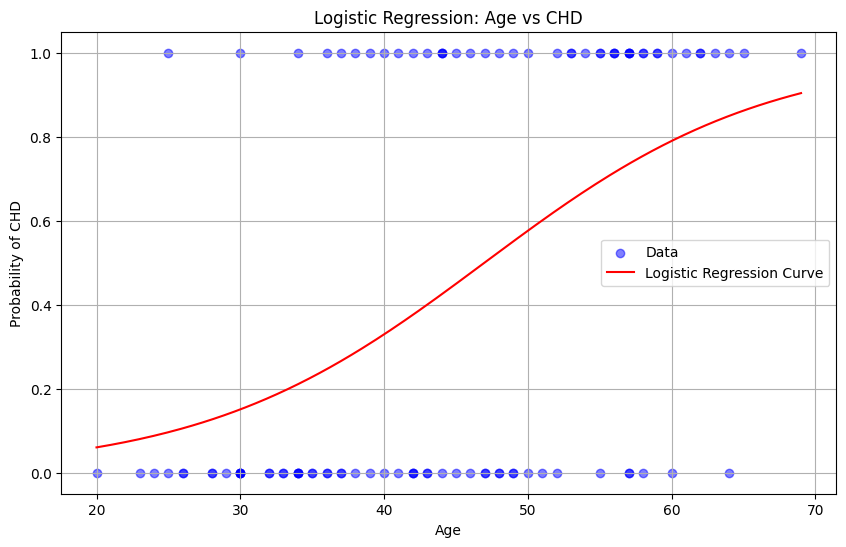

In [23]:
# @title  로지스틱 회귀 곡선 플롯팅
plt.figure(figsize=(10, 6))

# 실제 데이터 산포도
plt.scatter(df['AGE'], df['CHD'], color='blue', alpha=0.5, label='Data')

# 로지스틱 회귀로 예측한 곡선
plt.plot(AGE_new, y_pred, color='red', label='Logistic Regression Curve')

plt.xlabel('Age')  # x축 레이블: 나이
plt.ylabel('Probability of CHD')  # y축 레이블: 심장병 발생 확률
plt.title('Logistic Regression: Age vs CHD')  # 그래프 제목
plt.legend()  # 범례 표시
plt.grid(True)
plt.show()  # 그래프 출력